Classification - Testing different models on one data set

In [4]:
# Import Libraries and Modules
import pandas as pd
import numpy as np
import time
from pandas_datareader import data, wb
from datetime import datetime
import matplotlib.pyplot as plt

Prepare Data

In [6]:
# Setting the Date
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('today')

In [ ]:
# Pandas DataReader API (Quandl, Google, Yahoo, AlphaVantage, sooq ...)
Tickers = ['AAPL', 'TSLA', 'MSFT', 'QQQ', 'AMZN', 'SPY']
Stock_df = data.DataReader(Tickers, 'yahoo', start, end)
Stock_df.head()

In [5]:
Stock_df.isna().sum()

Attributes  Symbols
Adj Close   AAPL       0
            TSLA       0
            MSFT       0
            QQQ        0
            AMZN       0
            SPY        0
Close       AAPL       0
            TSLA       0
            MSFT       0
            QQQ        0
            AMZN       0
            SPY        0
High        AAPL       0
            TSLA       0
            MSFT       0
            QQQ        0
            AMZN       0
            SPY        0
Low         AAPL       0
            TSLA       0
            MSFT       0
            QQQ        0
            AMZN       0
            SPY        0
Open        AAPL       0
            TSLA       0
            MSFT       0
            QQQ        0
            AMZN       0
            SPY        0
Volume      AAPL       0
            TSLA       0
            MSFT       0
            QQQ        0
            AMZN       0
            SPY        0
dtype: int64

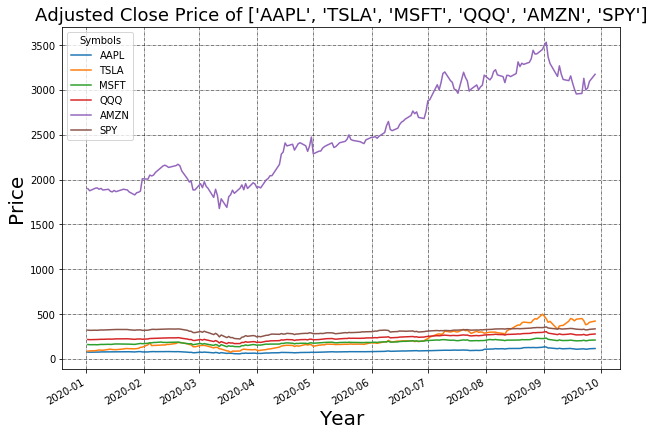

In [9]:
# Plot the adjusted close price
Stock_df['Adj Close'].plot( figsize = ( 10, 7))
# Define the label for the title of the figure
plt.title( "Adjusted Close Price of %s" % Tickers, fontsize = 18)
# Define the labels for x-axis and y-axis
plt.ylabel( 'Price', fontsize = 20)
plt.xlabel( 'Year', fontsize = 20)
# Plot the grid lines
plt.grid( which="major", color = 'k', linestyle = '-.', linewidth = 0.5)
# Show the plot
plt.show()

In [17]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normal_movements = normalizer.fit_transform(Stock_df['Adj Close'])

In [18]:
print(normal_movements.min())
print(normal_movements.max())
print(normal_movements.mean())

0.028104154573296614
0.985570478389803
0.2309613681355101


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

normalizer = Normalizer()
kmeans = KMeans( n_clusters=5, max_iter = 1000, random_state = 1)
pipeline = make_pipeline( normalizer, kmeans)

pipeline.fit(Stock_df['Adj Close'])
predictions = pipeline.predict(Stock_df['Adj Close'])